In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

options = webdriver.ChromeOptions()

ko_gold_trade_url = 'https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'
driver = webdriver.Chrome(service=Service("../driver/chromedriver"), options=options)

driver.get(ko_gold_trade_url)

driver.maximize_window()

time.sleep(2)


In [8]:
driver.close()

In [ ]:
import mysql.connector as msc
import pandas as pd

mydb = msc.connect(
    host = "", # host Database Endpoint
    port = , # host Port
    user = "", # user id
    password = "", # user password
    database = '' # using database name
)
cur = mydb.cursor()


In [28]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np

In [29]:
import matplotlib.dates as mdates

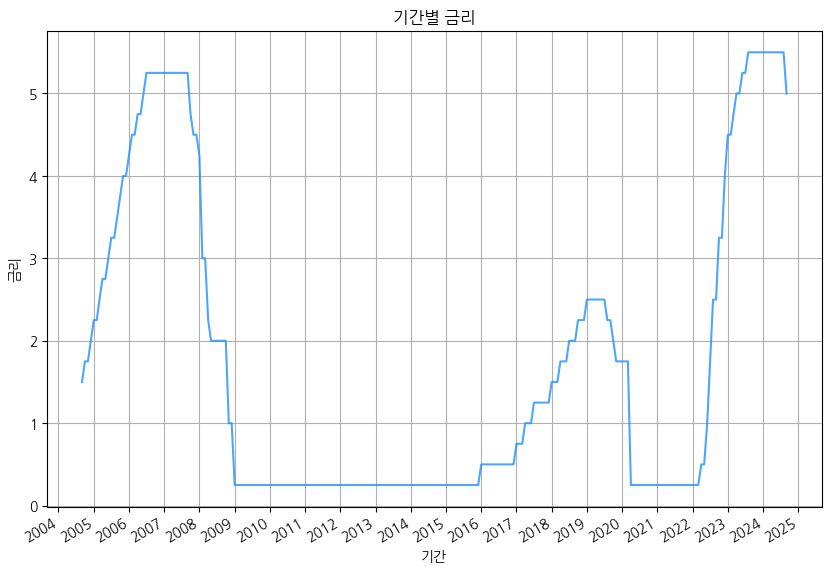

In [53]:
# 금리 추출 
cur.execute('SELECT * FROM interest_rate')

columns = [column[0] for column in cur.description] 
data = cur.fetchall()  
df_interest_rate = pd.DataFrame(data, columns=columns)



plt.figure(figsize=(10, 7))
plt.plot(df_interest_rate['date'],df_interest_rate['usa_interest_rate'],color='dodgerblue', alpha =0.8)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


plt.title('기간별 금리')
plt.xlabel('기간')
plt.ylabel('금리')

plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

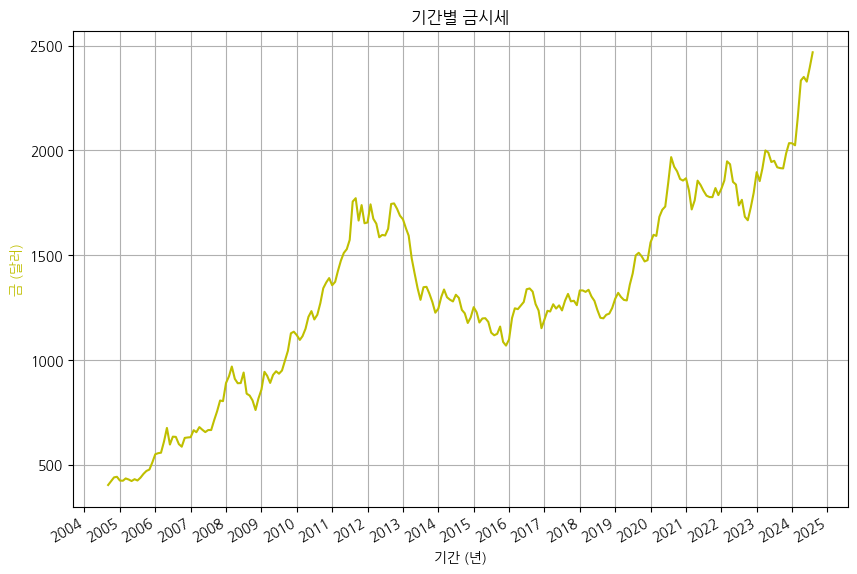

In [66]:
cur.execute('SELECT * FROM gold')

columns = [column[0] for column in cur.description] 
data = cur.fetchall()  
df_gold_price = pd.DataFrame(data, columns=columns)


plt.figure(figsize=(10, 7))
plt.plot(df_gold_price['date'],df_gold_price['price'], color='y')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


plt.title('기간별 금시세')
plt.xlabel('기간 (년)')
plt.ylabel('금 (달러)', color='y')

plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

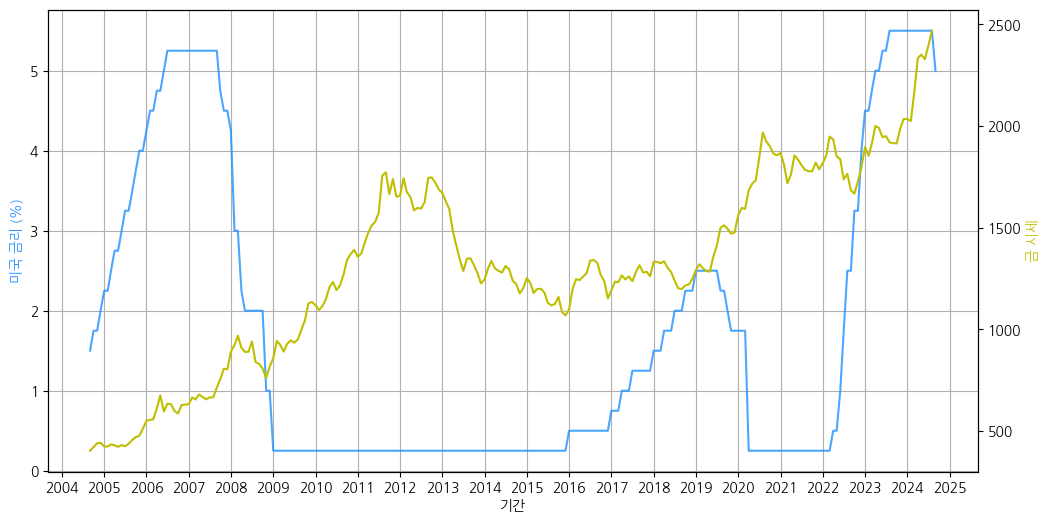

In [81]:
# (실질)금리 하락시 금 시세 상승 (실질 금리 : 명목이자율 - 예상 물가 상승률 : 내가 쓸 수 있는 금리)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(df_interest_rate['date'],df_interest_rate['usa_interest_rate'],color='dodgerblue', alpha =0.8)
ax2.plot(df_gold_price['date'],df_gold_price['price'], 'y-', label='yellow')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


ax1.set_xlabel('기간')
ax1.set_ylabel('미국 금리 (%)',color='dodgerblue')
ax2.set_ylabel('금 시세',color='y')

plt.savefig('../data/interest_rate_gold.jpg')

ax1.grid()
plt.show()

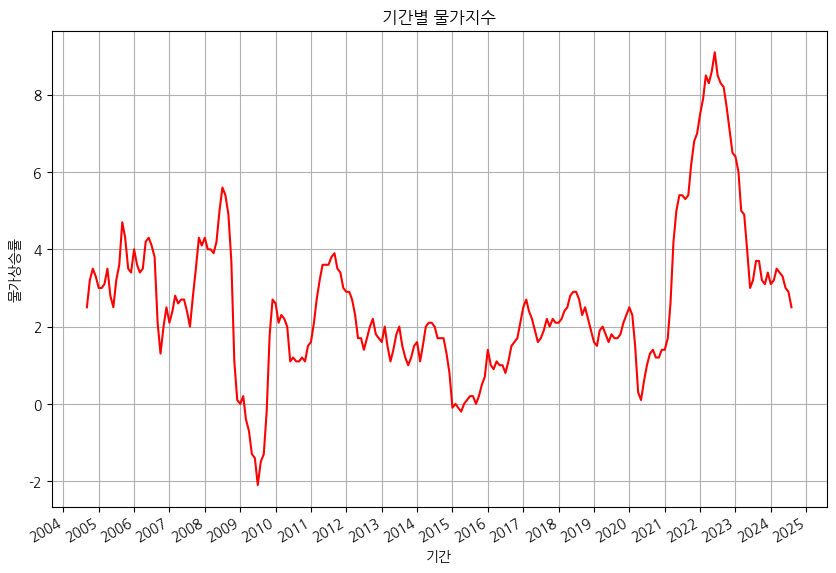

In [49]:
cur.execute('SELECT * FROM price_index')

columns = [column[0] for column in cur.description] 
data = cur.fetchall()  
df_price_index = pd.DataFrame(data, columns=columns)


plt.figure(figsize=(10, 7))
plt.plot(df_price_index['date'],df_price_index['usa_price_index'], color='r')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


plt.title('기간별 물가지수')
plt.xlabel('기간')
plt.ylabel('물가상승률')

plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

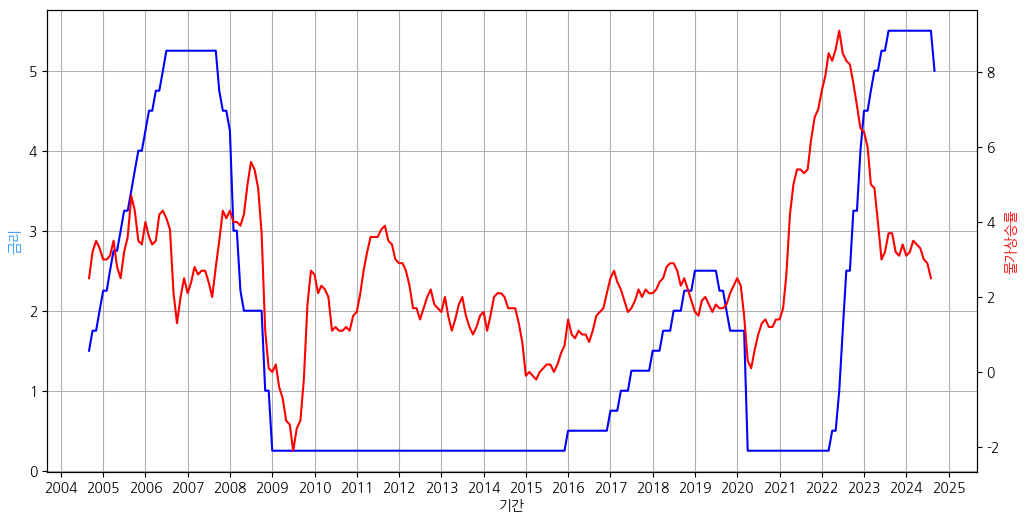

In [59]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(df_interest_rate['date'],df_interest_rate['usa_interest_rate'], 'b-', label='blue')
ax2.plot(df_price_index['date'],df_price_index['usa_price_index'], 'r-', label='red')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


ax1.set_xlabel('기간')
ax1.set_ylabel('금리', color='dodgerblue')
ax2.set_ylabel('물가상승률', color='r')

plt.savefig('../data/interest_rate_price_index.jpg')

ax1.grid()
plt.show()

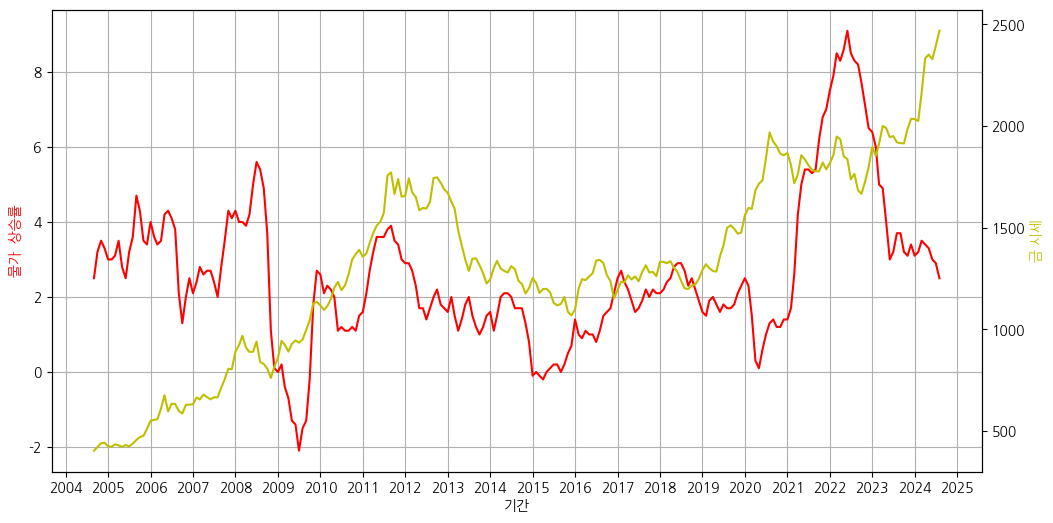

In [80]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(df_price_index['date'],df_price_index['usa_price_index'], 'r-', label='red')
ax2.plot(df_gold_price['date'],df_gold_price['price'], 'y-', label='yellow')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


ax1.set_xlabel('기간')
ax1.set_ylabel('물가  상승률', color='r')
ax2.set_ylabel('금 시세', color='y')

plt.savefig('../data/price_index_gold.jpg')

ax1.grid()
plt.show()

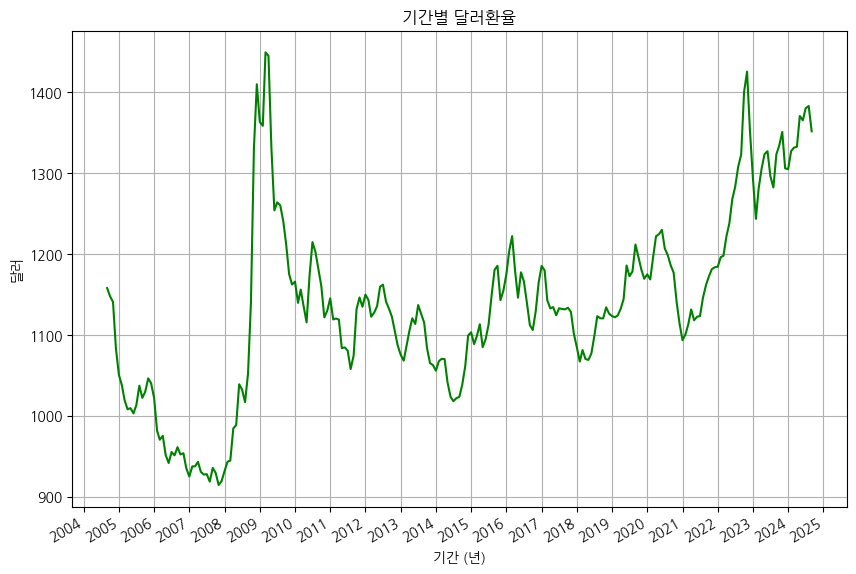

In [25]:

# 2008~2009년 글로벌 금융위기 (리먼 브라더스 파산)

cur.execute('SELECT * FROM exchange_rate')

columns = [column[0] for column in cur.description] 
data = cur.fetchall()  
df_exchange_rate = pd.DataFrame(data, columns=columns)


plt.figure(figsize=(10, 7))
plt.plot(df_exchange_rate['date'],df_exchange_rate['exchange_rate_wd'], color='g')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


plt.title('기간별 달러환율')
plt.xlabel('기간 (년)')
plt.ylabel('달러')

plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

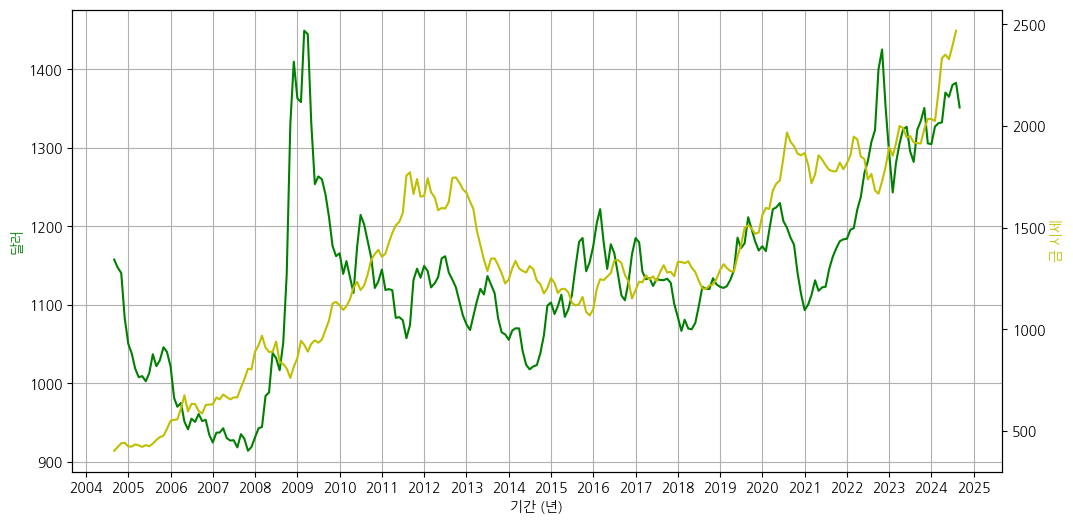

In [79]:
# 달러화 가치와 금 가격은 반대

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(df_exchange_rate['date'],df_exchange_rate['exchange_rate_wd'], 'g-', label='green')
ax2.plot(df_gold_price['date'],df_gold_price['price'], 'y-', label='yellow')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


ax1.set_xlabel('기간 (년)')
ax1.set_ylabel('달러', color='g')
ax2.set_ylabel('금 시세', color='y')

plt.savefig('../data/dollar_gold.jpg')

ax1.grid()
plt.show()

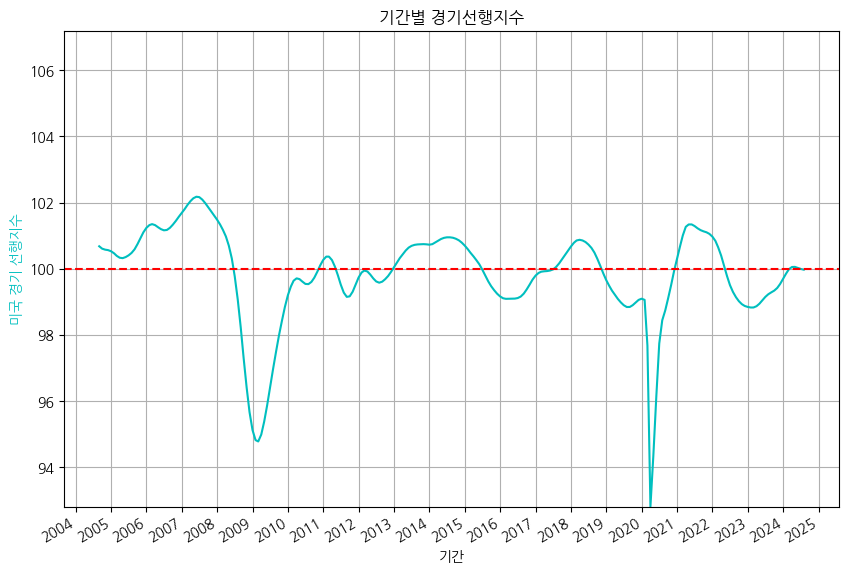

In [62]:
# LEI (미국 경기선행지수)

cur.execute('SELECT * FROM lei')

columns = [column[0] for column in cur.description] 
data = cur.fetchall()
df_lei_rate = pd.DataFrame(data, columns=columns)


plt.figure(figsize=(10, 7))
plt.plot(df_lei_rate['date'],df_lei_rate['usa_LEI'], color='c')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


y_min = df_lei_rate['usa_LEI'].min()  # 데이터의 최솟값
y_max = df_lei_rate['usa_LEI'].max()  # 데이터의 최댓값

# 100을 기준으로 대칭 범위를 설정
margin = max(abs(100 - y_min), abs(100 - y_max))  # 100 기준 최대 편차 구하기
plt.ylim(100 - margin, 100 + margin) 

plt.axhline(y=100, color='r', linestyle='--') 

plt.title('기간별 경기선행지수')
plt.xlabel('기간')
plt.ylabel('미국 경기 선행지수', color='c')

plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

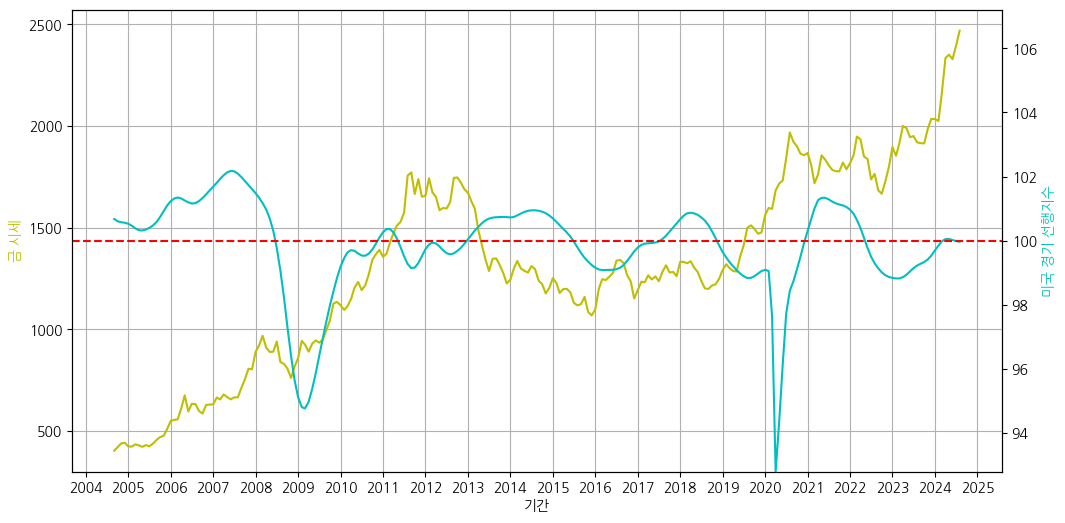

In [78]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(df_gold_price['date'],df_gold_price['price'], 'y-', label='yellow')
ax2.plot(df_lei_rate['date'],df_lei_rate['usa_LEI'], color='c')


margin = max(abs(100 - y_min), abs(100 - y_max))  # 100 기준 최대 편차 구하기
plt.ylim(100 - margin, 100 + margin) 

plt.axhline(y=100, color='r', linestyle='--') 

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


ax1.set_xlabel('기간')
ax1.set_ylabel('금 시세', color='y')
ax2.set_ylabel('미국 경기 선행지수', color='c')

plt.savefig('../data/gold_lei.jpg')

ax1.grid()
plt.show()

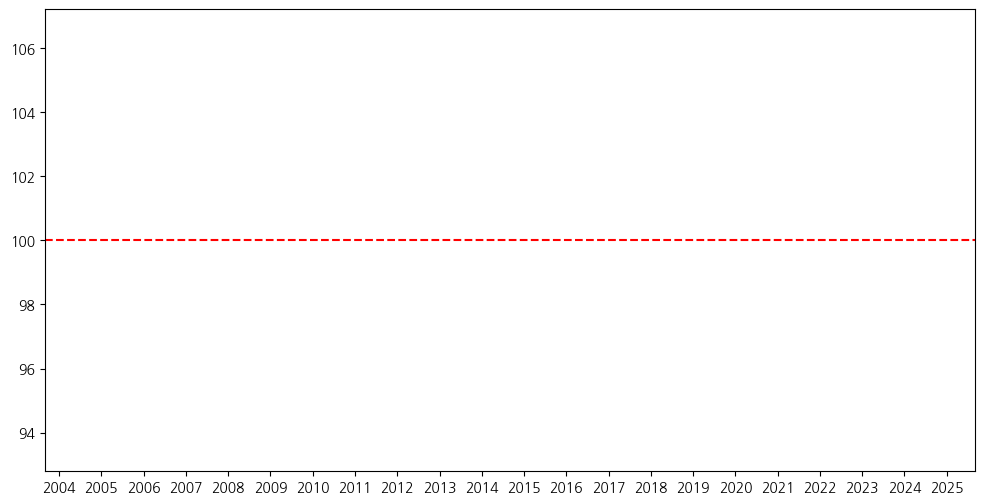

In [90]:

fig = plt.figure(figsize=(12,6))
ax=fig.add_subplot()

ax.plot(df_interest_rate['date'],df_interest_rate['usa_interest_rate'], 'b-', label='blue')
ax.plot(df_gold_price['date'],df_gold_price['price'], 'y-', label='yellow')
ax.plot(df_price_index['date'],df_price_index['usa_price_index'], 'r-', label='red')


margin = max(abs(100 - y_min), abs(100 - y_max))  # 100 기준 최대 편차 구하기
plt.ylim(100 - margin, 100 + margin) 

plt.axhline(y=100, color='r', linestyle='--') 

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 


ax1.set_xlabel('기간')

# plt.savefig('../data/gold_lei.jpg')


ax1.grid()
plt.show()